In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
# loading the IRIS dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Multinomial Logistic Regression

In [7]:
X_multi = df[['sepal length (cm)','sepal width (cm)']].values.reshape(150,2)
y_multi = df['target'].values

In [8]:
# Split the data into training/testing sets (80:20 split)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size= 0.20, random_state= 101)

In [9]:
# default regularization is l2 with alpha of 1, by putting c = 30 (inverse of alpha)
#I am decreaing the regularization coefficient
from sklearn.linear_model import LogisticRegression
log_reg_multi = LogisticRegression(C=0.01,random_state=42) # try 10, 0.1 and 0.01
log_reg_multi.fit(X_train_multi, y_train_multi)

LogisticRegression(C=0.01, random_state=42)

##### Plotting the decision boundary

### Checking Accuracy

In [10]:
print("training set score is : {:.3f}" .format(log_reg_multi.score(X_train_multi,y_train_multi)))
print("test set score is : {:.3f}" .format(log_reg_multi.score(X_test_multi,y_test_multi)))

training set score is : 0.692
test set score is : 0.667


### Effect of Data Preprocessing

In [18]:
# scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg_multi = LogisticRegression(C=0.01,random_state=42) # try 10, 0.1 and 0.01
log_reg_multi.fit(X_train_scaled, y_train_multi)

LogisticRegression(C=0.01, random_state=42)

In [20]:
print("training set score is : {:.3f}" .format(log_reg_multi.score(X_train_scaled,y_train_multi)))
print("test set score is : {:.3f}" .format(log_reg_multi.score(X_test_scaled,y_test_multi)))

training set score is : 0.750
test set score is : 0.733


### KNN Classification

In [74]:
from sklearn import neighbors
N_NEIGHBORS = 15 # KNN number of neighbors
knn_model = neighbors.KNeighborsClassifier(N_NEIGHBORS, weights='uniform')
knn_model.fit(X_train_multi,y_train_multi)

KNeighborsClassifier(n_neighbors=15)

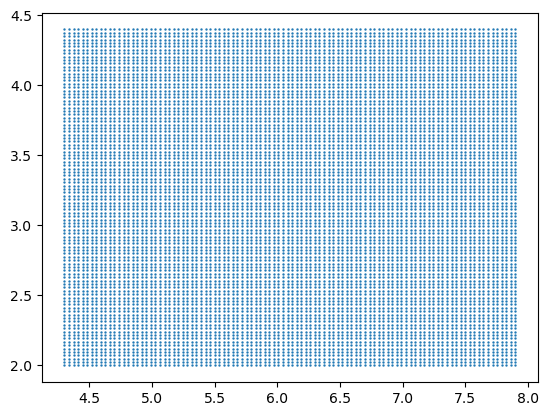

In [95]:
# visualizing the meshgrid

plt.scatter(x0, x1, s=0.5)
plt.show()

In [97]:
# establish colors and colormap
#  * color blind colors, from https://bit.ly/3qJ6LYL
redish = '#d73027'
orangeish = '#fc8d59'
yellowish = '#fee090'
blueish = '#4575b4'
colormap = np.array([redish,blueish,orangeish])

Text(0, 0.5, 'sepal width')

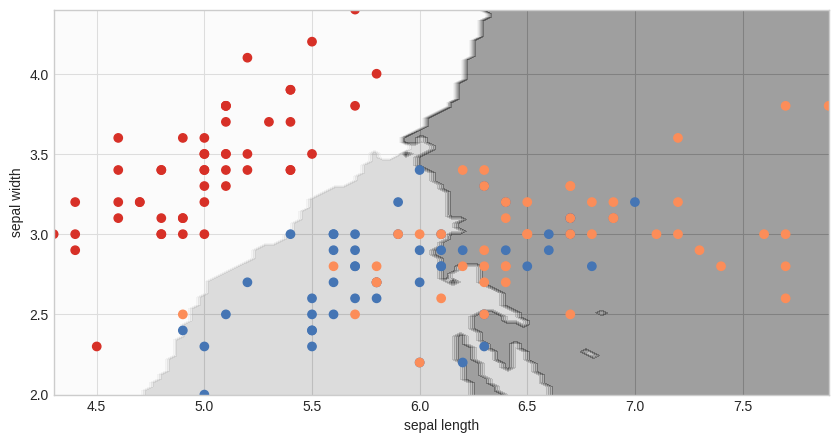

In [117]:
y_pred_knn = knn_model.predict(X_new)
zz_knn = y_pred_knn.reshape(x0.shape)

plt.figure(figsize=(10, 5))
plt.contourf(x0, x1, zz_knn, alpha = 0.4, cmap='Greys')
plt.scatter(X_multi[:,0], X_multi[:,1], c=colormap[y_multi])

plt.xlabel('sepal length')
plt.ylabel('sepal width')

Here is a blog post on further customizations for plotting the decision boundary in KNN Classification:
[link](https://www.tvhahn.com/posts/beautiful-plots-decision-boundary/)

In [6]:
plt.hist(X_train_multi)

NameError: name 'X_train_multi' is not defined